# Proyek Analisis Data: [E-Commerce Public Dataset - products_dataset]
- **Nama:** **Jeremy Djohar Riyadi**
- **Email:** **jeremydjohar@gmail.com**
- **ID Dicoding:** **Jeremy Djohar Riyadi**

## Menentukan Pertanyaan Bisnis

- Kategori produk mana yang memiliki rata rata berat tertinggi dan berpotensi meningkatkan biaya logistik?
- Dimensi produk mana yang paling berkontribusi terhadap berat produk dan berpotensi meningkatkan biaya pengiriman

## Import Semua Packages/Library yang Digunakan

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Data Wrangling**

### **Gathering Data**

In [5]:
df = pd.read_csv('products_dataset.csv')

Membaca dataset csv `product_dataset`

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [6]:
df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**

Dataset ini berisi sekitar 33 ribu produk dengan 7 fitur numerik dan 2 fitur kategorikal, di mana sebagian kolom memiliki missing value sehingga perlu pembersihan data sebelum analisis lanjutan

Kolom :
- product_id → kode unik untuk membedakan setiap produk
- product_category_name → nama kategori tempat produk tersebut dikelompokkan
- product_name_lenght → panjang karakter dari nama produk
- product_description_lenght → panjang karakter dari deskripsi produk
- product_photos_qty → jumlah foto yang dimiliki produk
- product_weight_g → berat produk dalam satuan gram
- product_length_cm → panjang fisik produk dalam sentimeter
- product_height_cm → tinggi fisik produk dalam sentimeter
- product_width_cm → lebar fisik produk dalam sentimeter

### **Assessing Data**

#### Missing Value

In [7]:
df.isnull().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


#### Duplicate Data

In [9]:
print(df.duplicated().sum())

0


#### Outlier Check

In [15]:
num_cols = df.select_dtypes(include="number").columns

outlier_dict = {}

for col in num_cols:
    data = df[col].dropna()
    q25 = np.percentile(data, 25)
    q75 = np.percentile(data, 75)
    iqr = q75 - q25
    minimum = q25 - 1.5 * iqr
    maximum = q75 + 1.5 * iqr
    outlier_dict[col] = df[(df[col] < minimum) | (df[col] > maximum)]

In [16]:
for col, outliers in outlier_dict.items():
    print(col, ":", len(outliers))

product_name_lenght : 290
product_description_lenght : 2078
product_photos_qty : 849
product_weight_g : 4551
product_length_cm : 1380
product_height_cm : 1892
product_width_cm : 912


**Insight:**
- Missing value tersebar pada semua kolom kecuali `product_id`, dengan jumlah antara 610 missing value atau 2 missing value
- Tidak ditemukan data duplikat sama sekali, menandakan setiap produk memiliki identitas unik dan kualitas pencatatan data cukup baik
- Outlier tersebar di 7 kolom numerik yang berbeda dengan jumlah outlier masing masing seperti di atas, yang mengindikasikan adanya nilai ekstrem sehingga perlu penanganan khusus sebelum pemodelan

### **Cleaning Data**

#### Handling Missing Value

In [17]:
# memisahkan kolom numerikal dan kategorikal
num_cols = df.select_dtypes(include="number").columns
cat_cols = df.select_dtypes(include="object").columns

# imputasi numerik dengan median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# imputasi kategorikal dengan label 'unknown'
for col in cat_cols:
    df[col] = df[col].fillna("unknown")

#### Handling Outliers

In [18]:
for col in num_cols:
    q25 = df[col].quantile(0.25)
    q75 = df[col].quantile(0.75)
    iqr = q75 - q25

    lower_bound = q25 - 1.5 * iqr
    upper_bound = q75 + 1.5 * iqr

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

**Insight:**
- Missing value ditangani dengan imputasi agar jumlah data tetap maksimal dan tidak menghilangkan informasi dari kolom lain yang masih valid
- Imputasi median pada fitur numerikal dipilih karena lebih robust terhadap outlier dibandingkan mean
- Imputasi unknown pada fitur kategorikal menjaga konsistensi data tanpa membuat asumsi kategori baru
- Outlier ditangani menggunakan metode capping untuk mempertahankan seluruh observasi sehingga distribusi data tetap representatif dan stabil untuk pemodelan

## **Exploratory Data Analysis (EDA)**

#### Statistik Deskriptif Kolom Numerikal

In [19]:
print(df[num_cols].agg(["mean", "median", "min", "max"]).T)

                                   mean  median   min     max
product_name_lenght           48.553913    51.0  19.5    76.0
product_description_lenght   725.336378   595.0   4.0  1886.5
product_photos_qty             2.101272     1.0   1.0     6.0
product_weight_g            1359.446876   700.0   0.0  4300.0
product_length_cm             30.146581    25.0   7.0    68.0
product_height_cm             15.980577    13.0   2.0    40.5
product_width_cm              22.874814    20.0   6.0    52.5


#### Rata rata berat produk per kategori

In [25]:
print(
    df.groupby("product_category_name")["product_weight_g"]
      .mean()
      .sort_values(ascending=False)
)

product_category_name
moveis_escritorio                                 4148.139159
moveis_sala                                       3720.339744
moveis_cozinha_area_de_servico_jantar_e_jardim    3662.287234
moveis_quarto                                     3633.333333
eletrodomesticos_2                                3531.255556
                                                     ...     
fashion_underwear_e_moda_praia                     362.264151
fashion_esporte                                    344.736842
fashion_bolsas_e_acessorios                        331.711425
fashion_roupa_infanto_juvenil                      324.000000
telefonia                                          231.611993
Name: product_weight_g, Length: 74, dtype: float64


#### Jumlah produk per kategori

In [24]:
print(df["product_category_name"].value_counts())

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 74, dtype: int64


**Insight:**
- Rata rata panjang nama produk sekitar 49 karakter dengan median 51, menunjukkan sebagian besar nama produk cukup informatif dan konsisten tanpa terlalu panjang
- Panjang deskripsi produk memiliki variasi besar dengan rata rata 725 karakter dan median 595, mengindikasikan adanya perbedaan tingkat detail informasi antar produk
- Mayoritas produk hanya memiliki 1 hingga 2 foto, yang menunjukkan visual produk relatif terbatas meskipun rentang maksimum mencapai 6 foto
- Kategori furnitur seperti moveis_escritorio dan moveis_sala memiliki rata rata berat tertinggi, mencerminkan karakteristik produk berukuran besar dan berat
- Sebaliknya kategori fashion dan aksesoris memiliki berat rata rata paling ringan, sesuai dengan jenis produk yang mudah dikirim
- Distribusi jumlah produk per kategori tidak merata, dengan cama_mesa_banho dan esporte_lazer mendominasi jumlah produk
- Beberapa kategori memiliki jumlah produk sangat sedikit, yang berpotensi kurang representatif untuk analisis atau pemodelan lebih lanjut


## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk mana yang memiliki rata rata berat tertinggi dan berpotensi meningkatkan biaya logistik

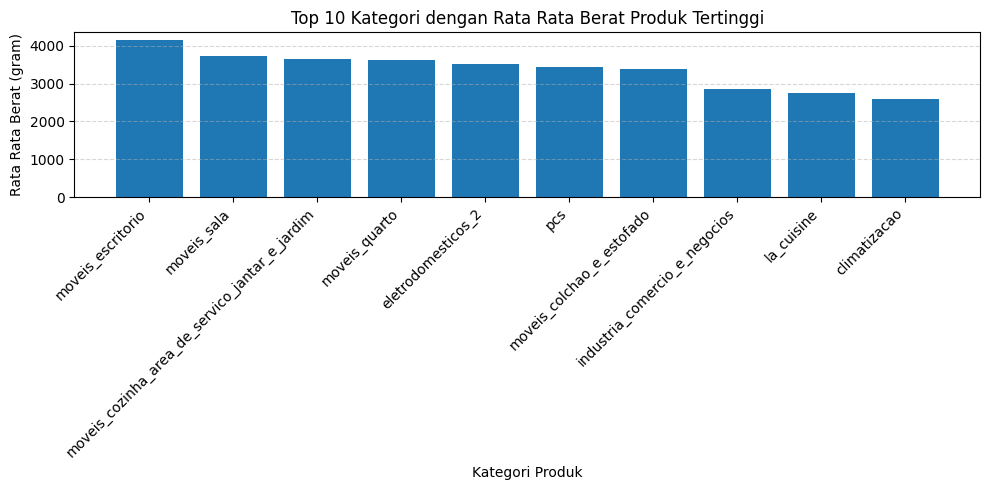

In [28]:
top_weight = (
    df.groupby("product_category_name")["product_weight_g"]
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(10, 5))
plt.bar(top_weight.index, top_weight.values)

plt.title("Top 10 Kategori dengan Rata Rata Berat Produk Tertinggi", fontsize=12)
plt.xlabel("Kategori Produk")
plt.ylabel("Rata Rata Berat (gram)")

plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


Kategori furnitur seperti moveis_escritorio dan moveis_sala memiliki berat rata rata paling tinggi sehingga berpotensi meningkatkan biaya pengiriman dan penanganan logistik
Insight ini penting untuk strategi pricing, subsidi ongkir, atau pengelompokan gudang khusus produk berat

### Pertanyaan 2: Dimensi produk mana yang paling berkontribusi terhadap berat produk dan berpotensi meningkatkan biaya pengiriman

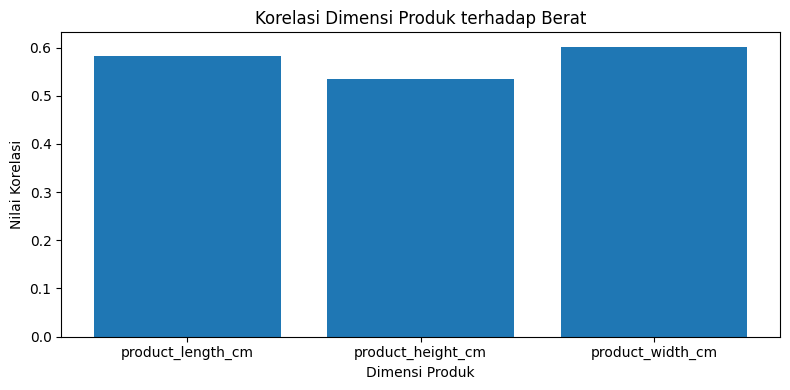

In [29]:
corr = df[
    [
        "product_weight_g",
        "product_length_cm",
        "product_height_cm",
        "product_width_cm"
    ]
].corr()["product_weight_g"].drop("product_weight_g")

plt.figure(figsize=(8, 4))
plt.bar(corr.index, corr.values)

plt.title("Korelasi Dimensi Produk terhadap Berat")
plt.xlabel("Dimensi Produk")
plt.ylabel("Nilai Korelasi")

plt.tight_layout()
plt.show()

Dimensi dengan korelasi tertinggi terhadap berat produk menunjukkan faktor utama yang mempengaruhi biaya pengiriman. Dengan mengoptimalkan desain atau kemasan pada dimensi tersebut, perusahaan berpotensi meminimalkan ongkir tanpa mengurangi jumlah produk yang dijual

**Insight:**
- Kategori furnitur memiliki rata rata berat produk paling tinggi sehingga menjadi kontributor utama biaya logistik dan perlu strategi khusus seperti penyesuaian harga atau optimasi pengiriman
- Dimensi produk menunjukkan korelasi kuat terhadap berat, sehingga optimasi desain dan kemasan pada dimensi dominan dapat membantu menekan biaya pengiriman tanpa mengurangi nilai jual


## Conclusion

- Proses data gathering berhasil menghasilkan dataset produk berukuran besar dan beragam dengan struktur data yang jelas serta tanpa duplikasi sehingga layak digunakan untuk analisis lanjutan
- Missing value yang relatif kecil berhasil ditangani melalui imputasi median untuk data numerikal dan label 'unknown' untuk data kategorikal tanpa mengurangi jumlah observasi
- Outlier pada fitur numerikal berhasil dikendalikan menggunakan metode capping sehingga distribusi data menjadi lebih stabil dan tidak bias oleh nilai ekstrem
- Exploratory data analysis menunjukkan perbedaan karakteristik produk yang signifikan antar kategori terutama terkait berat, dimensi, dan kelengkapan informasi produk
- Analisis visualisasi mengungkap bahwa kategori produk berat dan dimensi tertentu berkontribusi besar terhadap biaya logistik sehingga membuka peluang optimasi biaya dan peningkatan profit
